
# Analyse der Tabellenmerkmale nach Studiengängen

Die verschiedenen Studiengänge (inkl. dem übergeordneten Studiengang 0) werden nachfolgend im Kontext der gegebenen Merkmale betrachtet.

**Ergebnis**
Die Studiengänge 1 bis 4 ähneln sich sehr in der Form ihrer Merkmalsausprägungen. Dagegen weicht der Studiengang 0 in der Anzahl der unterschiedlichen Werte
für das Tabellenmerkmal objectid deutlich sichtbar von allen anderen ab. Im Gegensatz zu den anderen Studiengängen überragt die Anzahl der unterschiedlichen
Werte für das Tabellenmerkmal objectid sogar die des Merkmals timecreated.

### Import von Bibliotheken und anderen Erweiterungen

In [48]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [49]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [50]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data.head()

### Herstellung der Verbindung zur MySQL-Datenbank

In [51]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [52]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [53]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für alle Studiengänge

In [54]:
attributes = moodle_data.nunique()
display(attributes)

courseid                 579
Studiengang                5
userid                   142
relateduserid            145
action                    42
eventname                228
objecttable               69
objectid              172056
timecreated           383508
course_module_type        29
instanceid              4372
dtype: int64

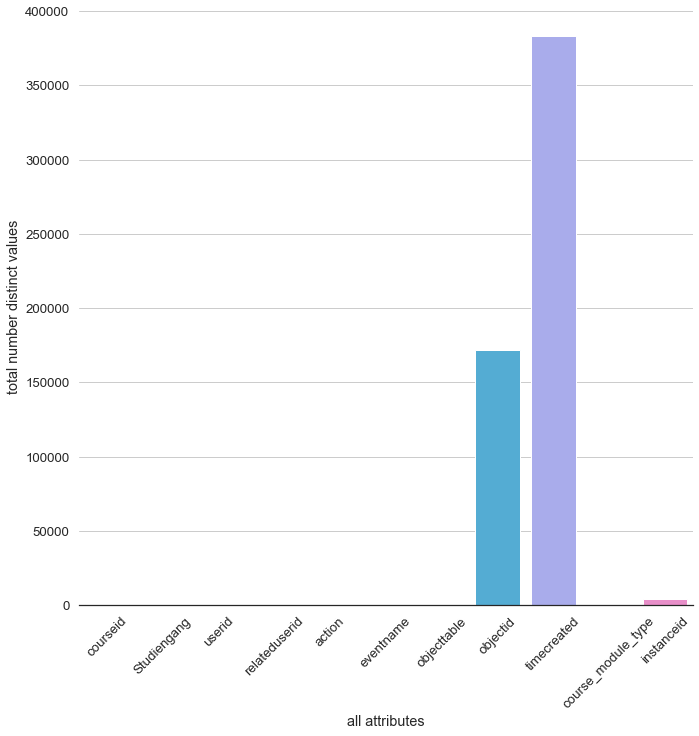

In [55]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für alle Studiengänge
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für alle Studiengänge
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 0

In [56]:

attributes = moodle_data[(moodle_data.Studiengang.astype(int) == 0)].nunique()
display(attributes)

courseid                 294
Studiengang                1
userid                   142
relateduserid            145
action                    31
eventname                148
objecttable               57
objectid              132566
timecreated           118512
course_module_type        20
instanceid               455
dtype: int64

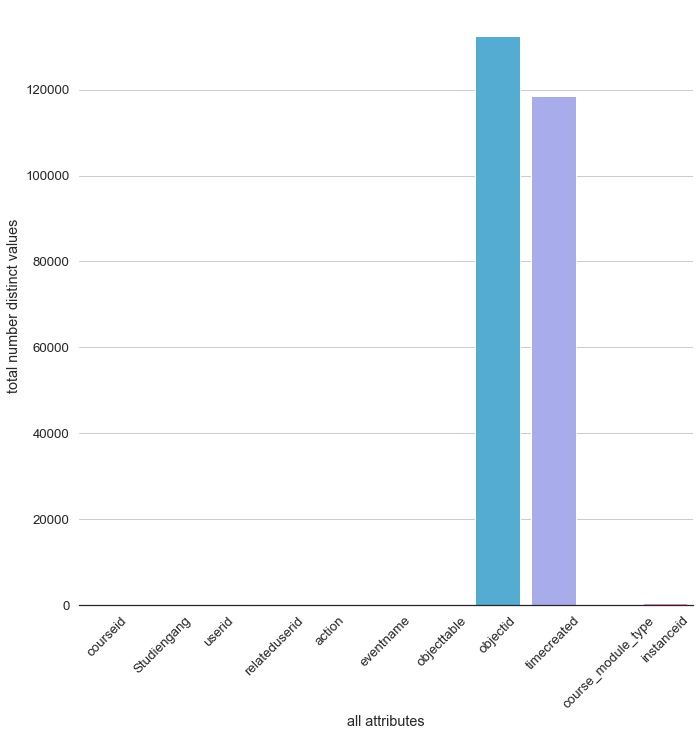

In [57]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 0
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 0
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 1

In [58]:

attributes = moodle_data[(moodle_data.Studiengang.astype(int) == 1)].nunique()
display(attributes)

courseid                 103
Studiengang                1
userid                    52
relateduserid             50
action                    26
eventname                150
objecttable               44
objectid               12029
timecreated           110127
course_module_type        21
instanceid               954
dtype: int64

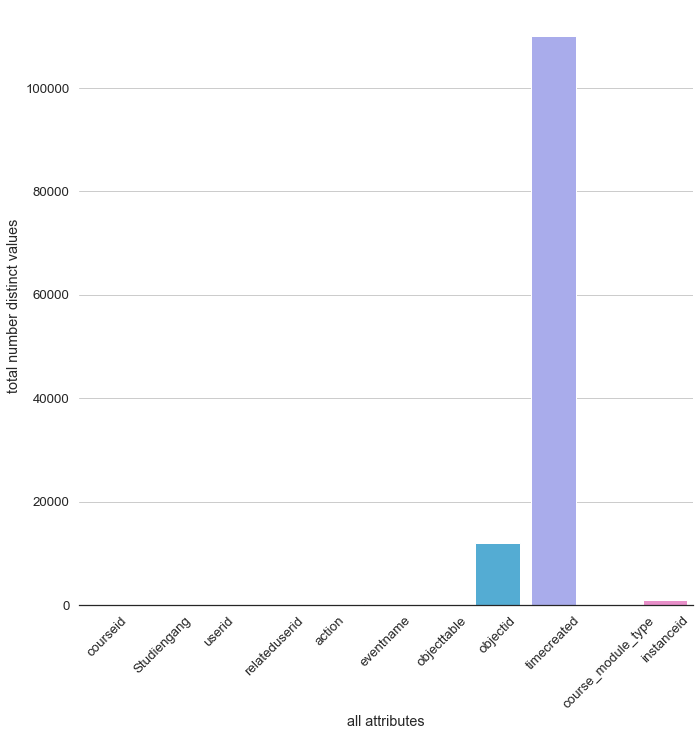

In [59]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 1
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 1
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 2

In [60]:

attributes = moodle_data[(moodle_data.Studiengang.astype(int) == 2)].nunique()
display(attributes)

courseid                112
Studiengang               1
userid                   39
relateduserid            34
action                   24
eventname               131
objecttable              46
objectid               6324
timecreated           53210
course_module_type       23
instanceid             1204
dtype: int64

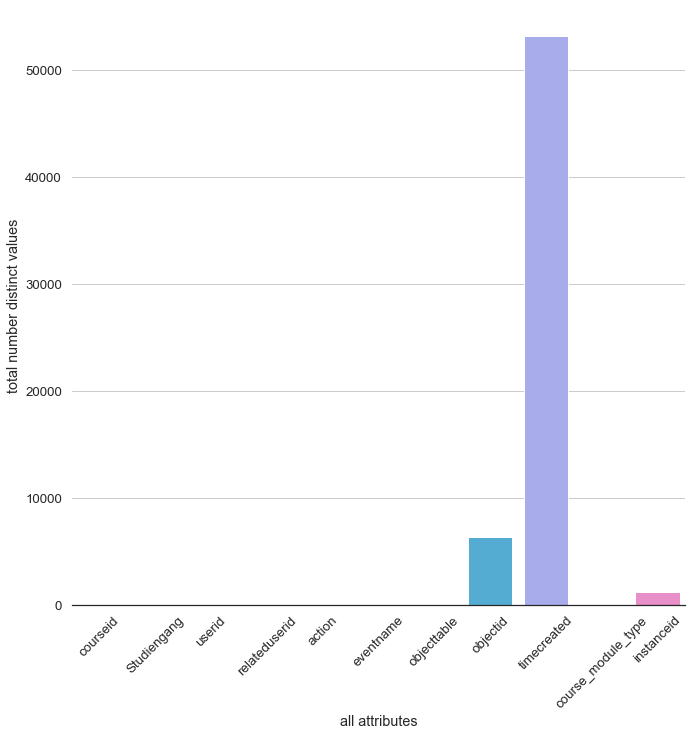

In [61]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 2
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 2
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 3

In [62]:

attributes = moodle_data[(moodle_data.Studiengang.astype(int) == 3)].nunique()
display(attributes)

courseid                 26
Studiengang               1
userid                   32
relateduserid            33
action                   21
eventname               135
objecttable              52
objectid              16333
timecreated           88678
course_module_type       20
instanceid             1336
dtype: int64

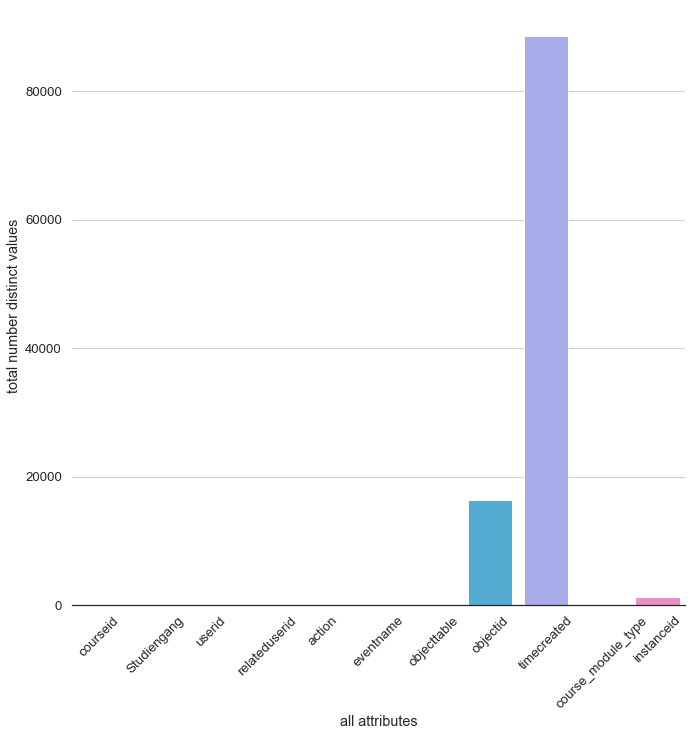

In [63]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 3
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 3
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Ausgabe der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 4

In [64]:

attributes = moodle_data[(moodle_data.Studiengang.astype(int) == 4)].nunique()
display(attributes)

courseid                 44
Studiengang               1
userid                   23
relateduserid            22
action                   25
eventname               127
objecttable              45
objectid               5849
timecreated           19794
course_module_type       20
instanceid              443
dtype: int64

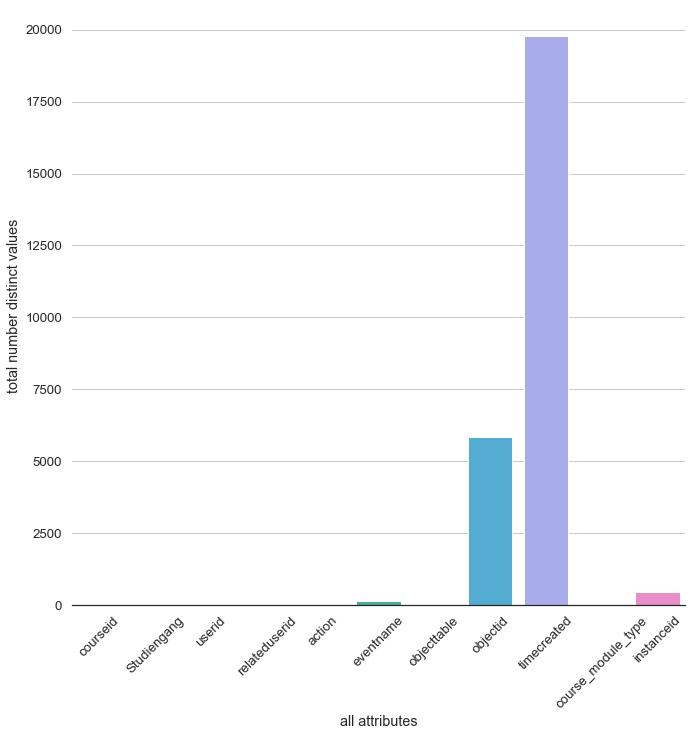

In [65]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 4
result = attributes
# Visualisierung der Mengen an unterschiedlichen Werten pro Tabellenmerkmal für Studiengang 4
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()